<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [4]</a>'.</span>

In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os
import powerlaw
import networkx as nx

import matplotlib.pyplot as plt

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

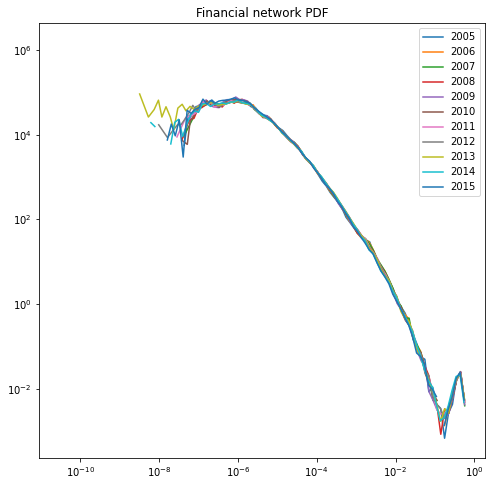

In [3]:
def plot_pdf_graph(G_name='A_country'):
    fig, ax  = plt.subplots(figsize = (8,8))

    for year in range(2005, 2016):

        network_path = os.path.join(output_filepath, str(year), f'{G_name}.graphml')
        G = nx.readwrite.graphml.read_graphml(network_path)

        df = nx.to_pandas_adjacency(G).stack().reset_index()
        df.columns = ['from', 'to', 'value']
        df = df[df.value>0]

        powerlaw.plot_pdf(df.value, label = year, ax=ax)
        
    plt.legend()
    
plot_pdf_graph('A_country')
plt.title('Financial network PDF')    
plt.show()

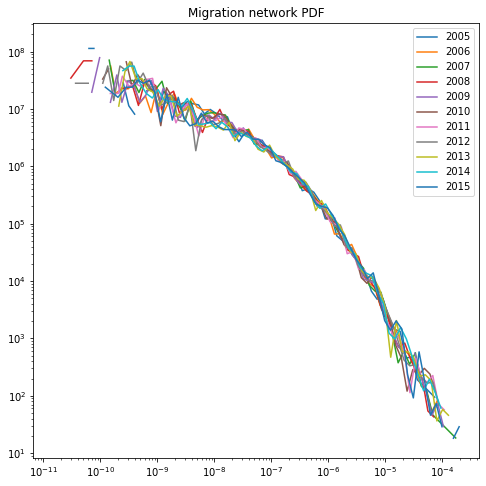

In [4]:
plot_pdf_graph('migration_network')
plt.title('Migration network PDF')    
plt.show()